<a href="https://colab.research.google.com/github/jyotidabass/Enhance-high-density-resolution-tongue-image/blob/main/Enhance_high_density_resolution_tongue_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/soumik12345/MIRNet
%cd MIRNet

Cloning into 'MIRNet'...
remote: Enumerating objects: 251, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 251 (delta 10), reused 8 (delta 8), pack-reused 237
Receiving objects: 100% (251/251), 28.13 MiB | 13.24 MiB/s, done.
Resolving deltas: 100% (112/112), done.
/content/MIRNet


In [ ]:
!pip install -q wandb

     |████████████████████████████████| 1.8 MB 4.1 MB/s 
     |████████████████████████████████| 181 kB 56.6 MB/s 
     |████████████████████████████████| 145 kB 60.6 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 


In [ ]:
from glob import glob
from PIL import Image
from matplotlib import pyplot as plt
from mirnet.inference import Inferer
from mirnet.utils import download_dataset, plot_result

import tensorflow as tf
import numpy as np
print(tf.__version__)

2.8.2


In [ ]:
inferer = Inferer()
inferer.download_weights('1sUlRD5MTRKKGxtqyYDpTv7T3jOW6aVAL')
inferer.build_model(
    num_rrg=3, num_mrb=2, channels=64,
    weights_path='low_light_weights_best.h5'
)
inferer.model.summary()

Downloading...
From: https://drive.google.com/uc?id=1sUlRD5MTRKKGxtqyYDpTv7T3jOW6aVAL
To: /content/MIRNet/low_light_weights_best.h5
100%|██████████| 148M/148M [00:01<00:00, 88.4MB/s]


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   1792        ['input_1[0][0]']                
                                64)                                                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, None, None,   36928       ['conv2d[0][0]']                 
                                64)                                                           

In [ ]:
inferer.model.save('mirnet')

INFO:tensorflow:Assets written to: mirnet/assets


In [ ]:
IMAGE_LOC = '/content/cropped-1E6AE7E2-F4F6-4EFC-AFEC-75B6AF988C47 - Abhishek Karekar.jpg'

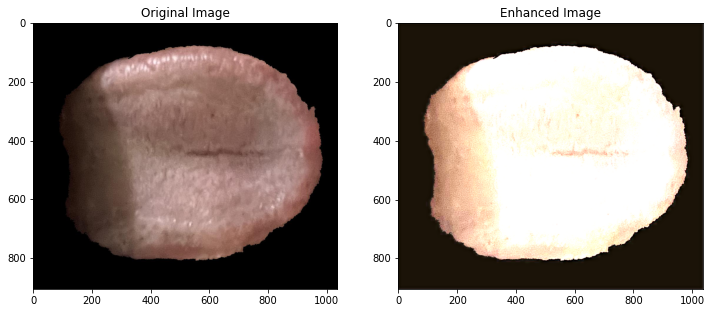

In [ ]:
original_image, output_image = inferer.infer(IMAGE_LOC)
plot_result(original_image, output_image)